# 乳腺癌合并其他癌症的数据挖掘

## 0. 预处理数据

In [102]:
# 数据另存为.pkl格式加速读取，执行一次

# import pandas as pd

# spdata = pd.read_excel('SP.xlsx')
# spdata.to_pickle('SP.pkl')

# mpdata = pd.read_excel('MP.xlsx')
# mpdata.to_pickle('MP.pkl')

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_rows', 80)

## 1. 读取数据

In [104]:
# 读取数据

spdata = pd.read_pickle('SP.pkl')
mpdata = pd.read_pickle('MP.pkl')

## 2. 数据描述

### 2.1 数据简表

In [105]:
spdata

,Patient ID,"Race recode (W, B, AI, API)","Race recode (White, Black, Other)",Year of diagnosis,Site recode ICD-O-3/WHO 2008,Primary Site - labeled,Histologic Type ICD-O-3,Grade,Laterality,"ICD-O-3 Hist/behav, malignant",...,Derived HER2 Recode (2010+),Tumor Size Summary (2016+),CS tumor size (2004-2015),CS site-specific factor 7 (2004+ varying by schema),COD to site recode,Survival months,COD to site rec KM,Sequence number,Age at diagnosis,Marital status at diagnosis
0,2422241,White,White,2016,Breast,C50.8-Overlapping lesion of breast,8522,Moderately differentiated; Grade II,Right - origin of primary,8522/3: Infiltrating duct and lobular carcinoma,...,Negative,86,Blank(s),60,Alive,11,Alive,One primary only,53,Married (including common law)
1,2839373,Asian or Pacific Islander,"Other (American Indian/AK Native, Asian/Pacifi...",2014,Breast,C50.1-Central portion of breast,8520,Moderately differentiated; Grade II,Right - origin of primary,"8520/3: Lobular carcinoma, NOS",...,Negative,Blank(s),22,60,Alive,31,Alive,One primary only,53,Single (never married)
2,2872246,White,White,2011,Breast,C50.2-Upper-inner quadrant of breast,8500,Poorly differentiated; Grade III,Left - origin of primary,"8500/3: Infiltrating duct carcinoma, NOS",...,Negative,Blank(s),36,80,Alive,61,Alive,One primary only,59,Unknown
3,2884393,White,White,2016,Breast,C50.3-Lower-inner quadrant of breast,8500,Moderately differentiated; Grade II,Right - origin of primary,"8500/3: Infiltrating duct carcinoma, NOS",...,Negative,15,Blank(s),70,Alive,8,Alive,One primary only,79,Married (including common law)
4,2900119,White,White,2010,Breast,C50.8-Overlapping lesion of breast,8500,Well differentiated; Grade I,Right - origin of primary,"8500/3: Infiltrating duct carcinoma, NOS",...,Negative,Blank(s),1,50,Alive,83,Alive,One primary only,58,Single (never married)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315142,77802828,Black,Black,2016,Breast,C50.5-Lower-outer quadrant of breast,8520,Unknown,Right - origin of primary,"8520/3: Lobular carcinoma, NOS",...,Negative,9,Blank(s),999,Alive,10,Alive,One primary only,72,Unknown
315143,77802872,White,White,2016,Breast,C50.8-Overlapping lesion of breast,8500,Well differentiated; Grade I,Left - origin of primary,"8500/3: Infiltrating duct carcinoma, NOS",...,Negative,8,Blank(s),999,Alive,6,Alive,One primary only,74,Married (including common law)
315144,77803868,Unknown,Unknown,2016,Breast,"C50.9-Breast, NOS",8500,Well differentiated; Grade I,Left - origin of primary,"8500/3: Infiltrating duct carcinoma, NOS",...,Negative,3,Blank(s),60,Alive,0,Alive,One primary only,81,Unknown
315145,77804049,White,White,2014,Breast,C50.4-Upper-outer quadrant of breast,8500,Moderately differentiated; Grade II,Right - origin of primary,"8500/3: Infiltrating duct carcinoma, NOS",...,Negative,Blank(s),12,60,Alive,29,Alive,One primary only,64,Married (including common law)


In [106]:
spdata['Year of diagnosis'].unique()

array([2016, 2014, 2011, 2010, 2013, 2015, 2012], dtype=int64)

In [107]:
mpdata

,Patient ID,Record number recode,Site recode B ICD-O-3/WHO 2008 (Event Variable),Year of diagnosis,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Age recode with <1 year olds,Age at diagnosis,Primary Site - labeled,Histologic Type ICD-O-3,...,Vital status recode (study cutoff used),Month of diagnosis recode,Month of follow-up recode,Year of follow-up recode,Event Number,Reason for Exit,Sequence Number (Calculated),Age at Event in Months (Calculated),Months Since Index (Calculated),Person Time Years (Calculated)
0,3976105,1,Female Breast,2014,White,Breast,70-74 years,74,"C50.9-Breast, NOS",8500,...,Alive,December,December,2016,Index Record,NaN,1,,,
1,3976105,2,Melanoma of the Skin,2016,White,Melanoma of the Skin,75-79 years,75,C44.6-Skin of upper limb and shoulder,8720,...,Alive,April,December,2016,1,End of Study,2,905,16,1.55
2,3984697,1,Female Breast,2010,White,Breast,60-64 years,64,C50.4-Upper-outer quadrant of breast,8500,...,Alive,January,December,2016,Index Record,NaN,1,,,
3,3984697,2,Lung and Bronchus,2015,White,Lung and Bronchus,70-74 years,70,"C34.3-Lower lobe, lung",8480,...,Alive,June,December,2016,1,End of Study,2,842,65,6.46
4,3984714,1,Female Breast,2010,White,Breast,65-69 years,67,C50.2-Upper-inner quadrant of breast,8500,...,Alive,January,December,2016,Index Record,NaN,1,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16571,77731532,2,NHL - Nodal,2016,White,NHL - Nodal,75-79 years,76,C77.3-Lymph nodes of axilla or arm,9823,...,Alive,August,December,2016,1,End of Study,2,921,22,1.71
16572,77738727,1,Female Breast,2015,Black,Breast,40-44 years,44,"C50.9-Breast, NOS",8500,...,Dead,August,December,2016,Index Record,NaN,1,,,
16573,77738727,2,Rectum,2016,Black,Rectum,45-49 years,45,"C20.9-Rectum, NOS",8070,...,Dead,July,December,2016,1,Death,2,550,11,0.83
16574,77785763,1,Female Breast,2014,White,Breast,75-79 years,75,C50.4-Upper-outer quadrant of breast,8480,...,Dead,December,October,2016,Index Record,NaN,1,,,


In [108]:
mpdata['Year of diagnosis'].unique()

array([2014, 2016, 2010, 2015, 2012, 2011, 2013], dtype=int64)

---

**解析**

1. 年度： 2010 - 2016 年 

2. 共计 323435例，其中**乳腺癌**共计：315147 例；**双原发癌**共计：16576/2 = 8288 例；乳腺癌:双原发癌 = 38:1；乳腺癌 97.4%，双原发癌 2.6%

---

### 2.2 数据列名

In [109]:
spdata.columns

Index(['Patient ID', 'Race recode (W, B, AI, API)',
       'Race recode (White, Black, Other)', 'Year of diagnosis',
       'Site recode ICD-O-3/WHO 2008', 'Primary Site - labeled',
       'Histologic Type ICD-O-3', 'Grade', 'Laterality',
       'ICD-O-3 Hist/behav, malignant',
       'Derived AJCC Stage Group, 7th ed (2010-2015)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)',
       'Derived SEER Cmb Stg Grp (2016+)', 'Derived SEER Combined T (2016+)',
       'Derived SEER Combined N (2016+)', 'Derived SEER Combined M (2016+)',
       'RX Summ--Surg Prim Site (1998+)', 'Radiation sequence with surgery',
       'Radiation recode', 'Chemotherapy recode (yes, no/unk)',
       'SEER Combined Mets at DX-bone (2010+)',
       'SEER Combined Mets at DX-brain (2010+)',
       'SEER Combined Mets at DX-liver (2010+)',
       'SEER Combined Mets at DX-lung (2010+)', 'Breast Subtype (2010+)',
       'ER Stat

In [110]:
mpdata.columns

Index(['Patient ID', 'Record number recode',
       'Site recode B ICD-O-3/WHO 2008 (Event Variable)', 'Year of diagnosis',
       'Race recode (W, B, AI, API)', 'Site recode ICD-O-3/WHO 2008',
       'Age recode with <1 year olds', 'Age at diagnosis',
       'Primary Site - labeled', 'Histologic Type ICD-O-3', 'Grade',
       'Laterality', 'Derived AJCC Stage Group, 7th ed (2010-2015)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)',
       'Derived SEER Cmb Stg Grp (2016+)', 'Derived SEER Combined T (2016+)',
       'Derived SEER Combined N (2016+)', 'Derived SEER Combined M (2016+)',
       'RX Summ--Surg Prim Site (1998+)', 'Radiation sequence with surgery',
       'Radiation recode', 'Chemotherapy recode (yes, no/unk)',
       'Tumor Size Summary (2016+)', 'CS tumor size (2004-2015)',
       'SEER Combined Mets at DX-bone (2010+)',
       'SEER Combined Mets at DX-brain (2010+)',
       'SEER Co

---

**解析**

- 单原发癌与双原发癌数据表存在异同，须逐项讨论分析

---

### 2.3 分列描述

#### 2.3.1 Patient ID - 数据库索引号

In [111]:
spdata['Patient ID'].nunique()

315147

In [112]:
mpdata['Patient ID'].nunique()

8288

In [113]:
spunique = spdata['Patient ID'].unique()
mpunique = mpdata['Patient ID'].unique()

unique = True
for id in mpunique:
    if id in spunique:
        print(id)
        unique = False
unique

True

---

**解析**

- 单原发癌与双原发癌数据表内 Patient ID 无重复项

- 单原发癌与双原发癌数据表之间 Patient ID 无重复项

---

#### 2.3.2 Record number recode

In [114]:
mpdata['Record number recode'].unique()

array([1, 2], dtype=int64)

In [115]:
mpdata[mpdata['Record number recode']==1].shape

(8288, 52)

In [116]:
mpdata[mpdata['Record number recode']==2].shape

(8288, 52)

---

**解析**

- 双原发癌数据表内 Record number recode == 1 为原发乳腺癌

- 双原发癌数据表内 Record number recode == 2 为第二原发癌

- 表内数据均符合上述标准

---

#### 2.3.3 Year of diagnosis

In [117]:
spdata.groupby('Year of diagnosis').size()

Year of diagnosis
2010    40243
2011    42504
2012    43483
2013    45073
2014    46347
2015    48245
2016    49252
dtype: int64

In [118]:
mpdata[mpdata['Record number recode']==1].groupby('Year of diagnosis').size()

Year of diagnosis
2010    2237
2011    1928
2012    1558
2013    1255
2014     822
2015     429
2016      59
dtype: int64

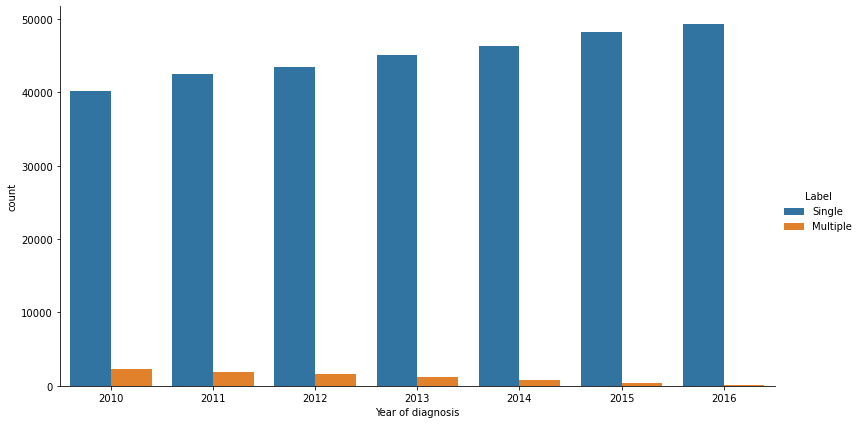

In [119]:
Yearofdiagnosis = pd.DataFrame()
Yearofdiagnosis['Year of diagnosis'] = spdata['Year of diagnosis'].append(mpdata[mpdata['Record number recode']==1]['Year of diagnosis'])
Yearofdiagnosis['Label'] = ''
Yearofdiagnosis['Label'][:spdata.shape[0]] = 'Single'
Yearofdiagnosis['Label'][spdata.shape[0]:] = 'Multiple'

yearplot = sns.catplot(x='Year of diagnosis', kind='count', hue='Label', data=Yearofdiagnosis, height=6, aspect=1.8)

---

**解析**

1. 单发癌从2010年40243缓慢上升到2016年49252例

2. 双原发癌从2010年2237例缓慢下降到2016年59例

3. 原因为：XXXXX

---

#### 2.3.4 Age at diagnosis

In [120]:
spdata['Age at diagnosis'].describe()

count    315147.000000
mean         60.345572
std          13.551842
min           2.000000
25%          50.000000
50%          60.000000
75%          70.000000
max         118.000000
Name: Age at diagnosis, dtype: float64

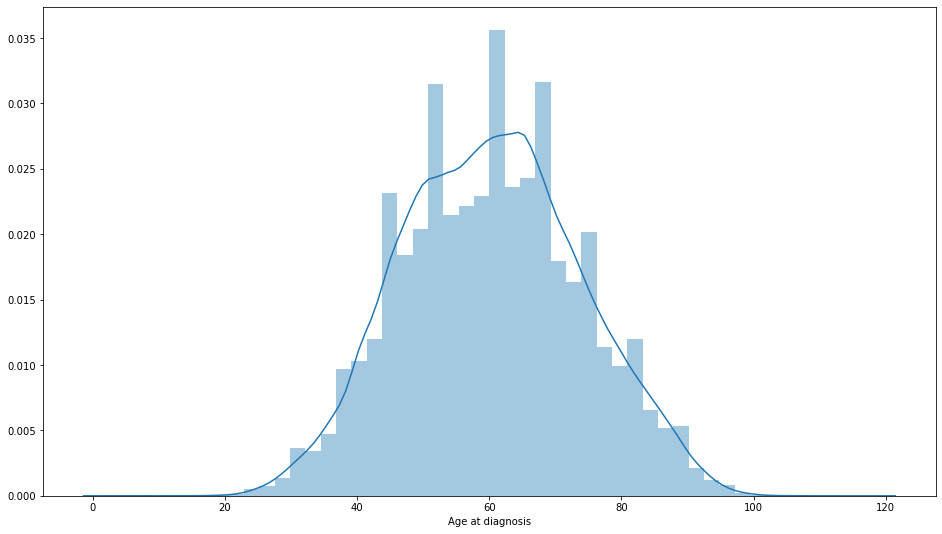

In [121]:
# 图形验证正态分布

plt.figure(figsize=(16,9))
sns.distplot(spdata['Age at diagnosis']);

In [122]:
mpdata[mpdata['Record number recode']==1]['Age at diagnosis'].describe()

count    8288.000000
mean       64.295125
std        12.963698
min        23.000000
25%        55.000000
50%        65.000000
75%        74.000000
max       103.000000
Name: Age at diagnosis, dtype: float64

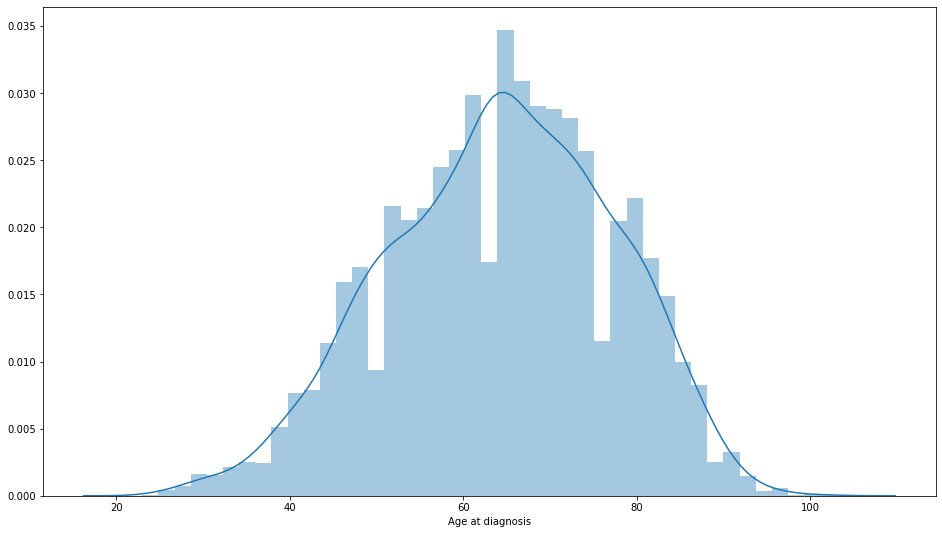

In [123]:
plt.figure(figsize=(16,9))
sns.distplot(mpdata[mpdata['Record number recode']==1]['Age at diagnosis']);

In [124]:
# 检验是否方差齐性

stats.levene(spdata['Age at diagnosis'], mpdata[mpdata['Record number recode']==1]['Age at diagnosis'])

LeveneResult(statistic=31.672943272573203, pvalue=1.8259673261950383e-08)

In [125]:
# 方差不齐时 equal_var=False

stats.ttest_ind(spdata['Age at diagnosis'], mpdata[mpdata['Record number recode']==1]['Age at diagnosis'], equal_var=False)

Ttest_indResult(statistic=-27.34584312010754, pvalue=4.503516679202185e-158)

---

**解析**

1. 单原发癌与双原发癌诊断乳腺癌年龄图示法均成正态分布

2. 二者年龄均值有显著差异，双原发癌平均年龄高于单原发乳腺癌

---

#### 2.3.5 Site recode B ICD-O-3/WHO 2008 (Event Variable) / Site recode ICD-O-3/WHO 2008

In [126]:
mpdata[mpdata['Record number recode']==1]['Site recode B ICD-O-3/WHO 2008 (Event Variable)'].unique()

array(['Female Breast'], dtype=object)

In [127]:
mpdata[mpdata['Record number recode']==1]['Site recode ICD-O-3/WHO 2008'].unique()

array(['Breast'], dtype=object)

In [128]:
mpdata[mpdata['Record number recode']==2]['Site recode B ICD-O-3/WHO 2008 (Event Variable)'].unique()

array(['Melanoma of the Skin', 'Lung and Bronchus', 'Female Breast',
       'Thyroid', 'Acute Myeloid Leukemia', 'NHL - Extranodal',
       'Pancreas', 'Urinary Bladder', 'Ovary', 'Cecum', 'Ascending Colon',
       'Chronic Lymphocytic Leukemia', 'Other Female Genital Organs',
       'Esophagus', 'Cervix Uteri', 'Corpus Uteri', 'Rectum',
       'Hepatic Flexure', 'Sigmoid Colon', 'Large Intestine, NOS',
       'Soft Tissue including Heart', 'Peritoneum, Omentum and Mesentery',
       'NHL - Nodal', 'Larynx', 'Liver', 'Gum and Other Mouth',
       'Salivary Gland', 'Kidney', 'Miscellaneous', 'Myeloma',
       'Descending Colon', 'Ureter', 'Vulva', 'Gallbladder',
       'Rectosigmoid Junction', 'Small Intestine', 'Brain', 'Stomach',
       'Tonsil', 'Anus, Anal Canal and Anorectum', 'Renal Pelvis',
       'Appendix', 'Adrenal Gland', 'Eye and Orbit - Melanoma',
       'Other Biliary', 'Transverse Colon', 'Tongue',
       'Acute Monocytic Leukemia', 'Intrahepatic Bile Duct',
       'Hodgk

In [129]:
mpdata[mpdata['Record number recode']==2]['Site recode B ICD-O-3/WHO 2008 (Event Variable)'].nunique()

80

In [130]:
mpdata[mpdata['Record number recode']==2].groupby('Site recode B ICD-O-3/WHO 2008 (Event Variable)').size().sort_values(ascending=False)

Site recode B ICD-O-3/WHO 2008 (Event Variable)
Female Breast                               2269
Lung and Bronchus                           1092
Corpus Uteri                                 517
Thyroid                                      474
Melanoma of the Skin                         378
Pancreas                                     314
Kidney                                       254
Ovary                                        215
Urinary Bladder                              192
NHL - Nodal                                  174
Acute Myeloid Leukemia                       162
Rectum                                       161
Cecum                                        136
Ascending Colon                              136
Myeloma                                      129
Miscellaneous                                128
Sigmoid Colon                                127
Stomach                                      119
NHL - Extranodal                              91
Liver                

In [131]:
mpdata[mpdata['Record number recode']==2]['Site recode ICD-O-3/WHO 2008'].nunique()

75

In [132]:
mpdata[mpdata['Record number recode']==2].groupby('Site recode ICD-O-3/WHO 2008').size().sort_values(ascending=False)

Site recode ICD-O-3/WHO 2008
Breast                                               2269
Lung and Bronchus                                    1092
Corpus Uteri                                          517
Thyroid                                               474
Melanoma of the Skin                                  378
Pancreas                                              314
Kidney and Renal Pelvis                               266
Ovary                                                 215
Urinary Bladder                                       192
NHL - Nodal                                           174
Acute Myeloid Leukemia                                162
Rectum                                                161
Cecum                                                 136
Ascending Colon                                       136
Myeloma                                               129
Miscellaneous                                         128
Sigmoid Colon                              

In [133]:
site_with_b = mpdata[mpdata['Record number recode']==2].groupby('Site recode B ICD-O-3/WHO 2008 (Event Variable)').size().sort_values(ascending=False)
site_without_b = mpdata[mpdata['Record number recode']==2].groupby('Site recode ICD-O-3/WHO 2008').size().sort_values(ascending=False)

In [134]:
sitedata = pd.DataFrame()
sitedata['Site recode B ICD-O-3/WHO 2008 (Event Variable)'] = site_with_b.index[0:75]
sitedata['value_B'] = site_with_b.values[0:75]
sitedata['cum_value_B'] = sitedata['value_B'].cumsum()
sitedata['cum_value_B_pct'] = sitedata['cum_value_B']/sitedata['value_B'].sum()

sitedata['Site recode ICD-O-3/WHO 2008'] = site_without_b.index
sitedata['value'] = site_without_b.values
sitedata['cum_value'] = sitedata['value'].cumsum()
sitedata['cum_value_pct'] = sitedata['cum_value']/sitedata['value'].sum()

In [135]:
sitedata.style.bar(subset=['value_B', 'value'], color='green')

,Site recode B ICD-O-3/WHO 2008 (Event Variable),value_B,cum_value_B,cum_value_B_pct,Site recode ICD-O-3/WHO 2008,value,cum_value,cum_value_pct
0,Female Breast,2269,2269,0.273935,Breast,2269,2269,0.273769
1,Lung and Bronchus,1092,3361,0.405771,Lung and Bronchus,1092,3361,0.405526
2,Corpus Uteri,517,3878,0.468188,Corpus Uteri,517,3878,0.467905
3,Thyroid,474,4352,0.525413,Thyroid,474,4352,0.525097
4,Melanoma of the Skin,378,4730,0.571049,Melanoma of the Skin,378,4730,0.570705
5,Pancreas,314,5044,0.608958,Pancreas,314,5044,0.608591
6,Kidney,254,5298,0.639623,Kidney and Renal Pelvis,266,5310,0.640685
7,Ovary,215,5513,0.665580,Ovary,215,5525,0.666626
8,Urinary Bladder,192,5705,0.688760,Urinary Bladder,192,5717,0.689792
9,NHL - Nodal,174,5879,0.709767,NHL - Nodal,174,5891,0.710787


In [136]:
def highlight_diff(rowdata):
    return ['background-color: green' if rowdata['Site recode B ICD-O-3/WHO 2008 (Event Variable)'] != rowdata['Site recode ICD-O-3/WHO 2008'] else '' for v in rowdata]

sitedata.style.apply(highlight_diff, axis=1)

,Site recode B ICD-O-3/WHO 2008 (Event Variable),value_B,cum_value_B,cum_value_B_pct,Site recode ICD-O-3/WHO 2008,value,cum_value,cum_value_pct
0,Female Breast,2269,2269,0.273935,Breast,2269,2269,0.273769
1,Lung and Bronchus,1092,3361,0.405771,Lung and Bronchus,1092,3361,0.405526
2,Corpus Uteri,517,3878,0.468188,Corpus Uteri,517,3878,0.467905
3,Thyroid,474,4352,0.525413,Thyroid,474,4352,0.525097
4,Melanoma of the Skin,378,4730,0.571049,Melanoma of the Skin,378,4730,0.570705
5,Pancreas,314,5044,0.608958,Pancreas,314,5044,0.608591
6,Kidney,254,5298,0.639623,Kidney and Renal Pelvis,266,5310,0.640685
7,Ovary,215,5513,0.665580,Ovary,215,5525,0.666626
8,Urinary Bladder,192,5705,0.688760,Urinary Bladder,192,5717,0.689792
9,NHL - Nodal,174,5879,0.709767,NHL - Nodal,174,5891,0.710787


---

**解析**

1. 原发癌 Female Breast （ With B ) -> Breast ( Without B )，均为女性乳腺癌，无区别意义

2. 继发癌（第二原发癌）共计 80 种（ With B ) -> 75 种 ( Without B )

3. 按照前75种将两列数据合并，可见继发癌前十名分别为：乳腺癌、肺癌、子宫癌、甲状腺癌、皮肤黑色素瘤、胰腺癌、肾癌、卵巢癌、膀胱癌、非霍奇金淋巴瘤、急性骨髓性白血病

4. 前35种继发癌可占总数的95%，其余应算为“其他”类别

5. 两列表排序数据前35项种类无差别，故以种类数较少者"Site recode ICD-O-3/WHO 2008"列做统计用即可

---

#### 2.3.6 'Race recode (W, B, AI, API)', 'Race recode (White, Black, Other)'

In [137]:
spdata['Race recode (W, B, AI, API)'].unique()

array(['White', 'Asian or Pacific Islander', 'Black', 'Unknown',
       'American Indian/Alaska Native'], dtype=object)

In [138]:
spdata['Race recode (White, Black, Other)'].unique()

array(['White',
       'Other (American Indian/AK Native, Asian/Pacific Islander)',
       'Black', 'Unknown'], dtype=object)

In [139]:
spdata.groupby('Race recode (W, B, AI, API)').size()

Race recode (W, B, AI, API)
American Indian/Alaska Native      1943
Asian or Pacific Islander         28427
Black                             36350
Unknown                            3165
White                            245262
dtype: int64

In [140]:
spdata.groupby('Race recode (White, Black, Other)').size()

Race recode (White, Black, Other)
Black                                                         36350
Other (American Indian/AK Native, Asian/Pacific Islander)     30370
Unknown                                                        3165
White                                                        245262
dtype: int64

In [141]:
mpdata['Race recode (W, B, AI, API)'].unique()

array(['White', 'Black', 'Asian or Pacific Islander',
       'American Indian/Alaska Native'], dtype=object)

In [142]:
mpdata[mpdata['Record number recode']==1].groupby('Race recode (W, B, AI, API)').size()

Race recode (W, B, AI, API)
American Indian/Alaska Native      38
Asian or Pacific Islander         592
Black                             971
White                            6687
dtype: int64

In [143]:
971/8288

0.1171573359073359

In [144]:
6687/8288

0.8068291505791506

In [145]:
36350/315147

0.11534299866411547

In [146]:
245262/315147

0.7782463421831717

---

**解析**

1. 数据均已白人为主，单原发癌 白人 245262/315147 = 0.778 黑人 36350/315147 = 0.115; 双原发癌 白人 6687/8288 = 0.807 黑人 971/8288 = 0.117

2. 可以按照双原发癌表 Race recode (W, B, AI, API) 进行统计，除白人黑人外，其他以 Asian or Pacific Islander 为主，American Indian/Alaska Native 仅占极小一部分

---